### Telelcom Company Churn 🧐

* Para efectos de este ejercicio, analizaremos la `fuga` de clientes, de una empresa de telecomunifaciones situada en California USA.
* Aplicaremos un poco de `EDA` para indagar en los datos y rescatar insights

In [2]:
import pandas as pd

df = pd.read_csv('telecom_customer_churn.csv', delimiter=',')
df.head(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,...,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN


In [3]:
#Agrupamos por cantidad de tipo de clientes

type_qty = df.groupby('Customer Status', as_index= False)['Gender'].count()
type_qty = type_qty.sort_values('Gender', ascending = True)

In [4]:
#Vemos cuanto es el revenue por Customer Status

total_rev = df.groupby('Customer Status', as_index = False)['Total Revenue'].sum()
total_rev = total_rev.sort_values('Total Revenue')
total_rev

,Customer Status,Total Revenue
1,Joined,54279.75
0,Churned,3684459.82
2,Stayed,17632392.12


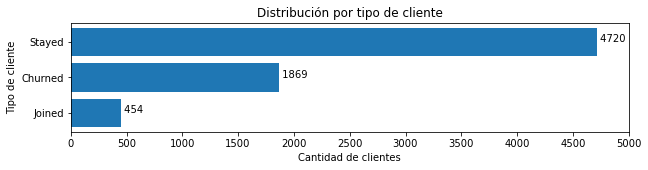

In [5]:
import matplotlib.pyplot as plt

cust_type = type_qty['Customer Status'].to_list() #[ctype for ctype,df in df.groupby('Customer Status')]

plt.figure(figsize=(10,2))
plt.barh(cust_type, type_qty['Gender'])

for index, value in enumerate(type_qty['Gender']):
    plt.text(value, index,
             ' '+ str(value))

plt.title('Distribución por tipo de cliente')
plt.xlabel('Cantidad de clientes')
plt.ylabel('Tipo de cliente')
plt.xticks(list(range(0,5500,500)));


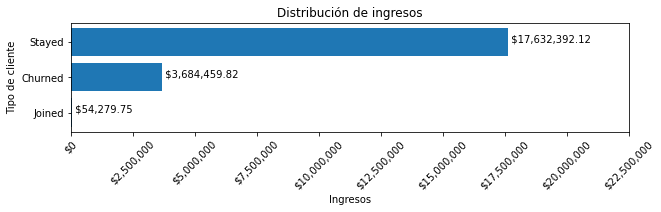

In [6]:
plt.figure(figsize=(10,2))
plt.barh(cust_type, total_rev['Total Revenue'])

b = list(range(0,25000000,2500000))
c = [f"${element :,}" for element in b]

for index, value in enumerate(total_rev['Total Revenue']):
    num = f" ${value :,.2f}"
    plt.text(value, index, num)

plt.title('Distribución de ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Tipo de cliente')
plt.xticks(b,c, rotation = 45);



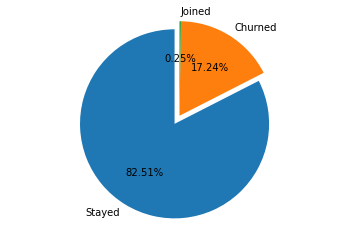

In [152]:
labels = 'Stayed', 'Churned', 'Joined'

sizes = [82.51, 17.24 , 0.25]
explode = (0.1, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow= False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Revisaremos en qué ciudades se producen las fugas 😿

In [8]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [24]:
churned_cities = df[df['Customer Status'] == 'Churned'].groupby('City', as_index = False)['Customer Status'].count()
churned_cities = churned_cities.sort_values('Customer Status', ascending=False)
churned_cities

,City,Customer Status
597,San Diego,185
390,Los Angeles,78
600,San Francisco,31
604,San Jose,29
230,Fallbrook,26
...,...,...
329,Jamestown,1
327,Ivanhoe,1
326,Isleton,1
324,Inverness,1


In [29]:
cities = churned_cities['City'].to_list()[0:10]
cities

['San Diego',
 'Los Angeles',
 'San Francisco',
 'San Jose',
 'Fallbrook',
 'Sacramento',
 'Temecula',
 'Escondido',
 'Long Beach',
 'Oakland']

## Top 10 - Ciudades con fugas

* Podemos observar que en el primer lugar del top, San Diego se lleva la peor parte de las fugas, seguido de Los Ángeles y San Francisco.

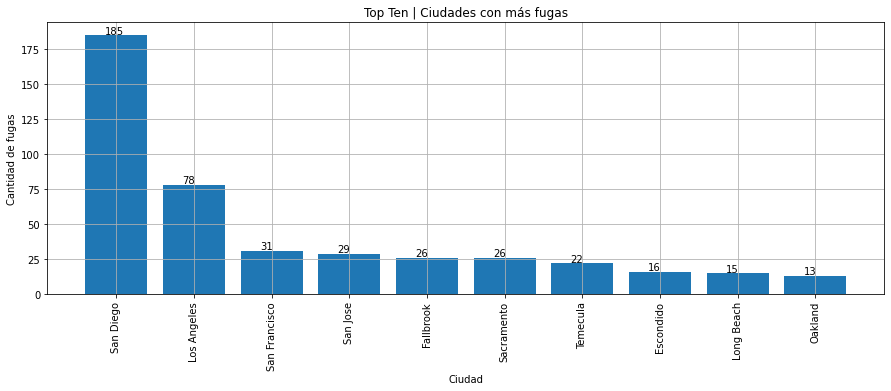

In [82]:
plt.figure(figsize=(15,5))
bars = plt.bar(cities, churned_cities['Customer Status'][0:10])


plt.xlabel('Ciudad')
plt.ylabel('Cantidad de fugas')
plt.title('Top Ten | Ciudades con más fugas')
plt.grid()

plt.xticks(cities, rotation = 'vertical')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.25, yval + 1, yval)

## ¿Por qué se están yendo?

In [112]:
churn_reasons_cat = df[df['Customer Status'] == 'Churned'].groupby('Churn Category', as_index = False)['Churn Reason'].count()
churn_reasons_cat = churn_reasons.sort_values('Churn Reason', ascending = True)
churn_reasons_cat

,Churn Category,Churn Reason
3,Other,182
4,Price,211
0,Attitude,314
2,Dissatisfaction,321
1,Competitor,841


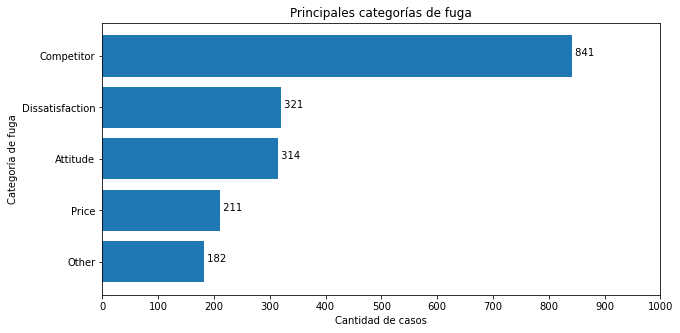

In [113]:
plt.figure(figsize = (10,5))
x = churn_reasons_cat['Churn Category'].to_list()
y = churn_reasons_cat['Churn Reason']

plt.barh(x,y)
plt.xlabel('Cantidad de casos')
plt.ylabel('Categoría de fuga')
plt.title('Principales categorías de fuga')
plt.xticks(list(range(0,1100,100)))

for i, v in enumerate(churn_reasons['Churn Reason']):
    plt.text(v, i, f" {str(v)}")


Si bien es cierto, la gráfica anterior nos brinda ya una idea de por qué los clientes se están fugando, **no nos permite conocer en detalle la razón**. Para esto utilizaremos el campo `"Churn Reason"`

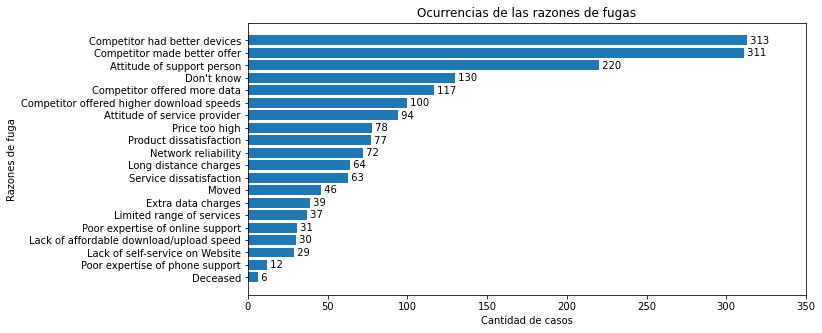

In [146]:
churn_reason = df[df['Customer Status'] == 'Churned'].groupby('Churn Reason', as_index = False)['City'].count()
churn_reason = churn_reason.sort_values('City',ascending= True)

x = churn_reason['Churn Reason'].to_list()
y = churn_reason['City']


plt.figure(figsize = (10,5))
plt.barh(x,y)
plt.title('Ocurrencias de las razones de fugas')
plt.xlabel('Cantidad de casos')
plt.ylabel('Razones de fuga')
plt.xticks(list(range(0,400,50)))

for i, v in enumerate(y):
    plt.text(v, i -0.25, f" {str(v)}")